In [183]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [184]:
import os
from google.colab import drive 
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/
os.chdir('/content/drive/My Drive/CE802')
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive
/content/drive/My Drive/CE802


# **Data Analyzing**

In [185]:
#reading and loading training dataset
train_data=pd.read_csv('/content/drive/My Drive/CE802/CE802_P2_Data.csv',sep=',')
train_data.head

<bound method NDFrame.head of       F1     F2     F3      F4     F5  ...  F12     F13    F14   F15  Class
0     20 -21.42  13.10  464.04  -6.10  ...  365    0.47   3.40 -3.90  False
1     20 -27.12  13.50  299.04  -6.18  ...  205 -129.53   7.12   NaN  False
2     20 -33.87  10.50  854.04  -9.32  ...  330  -44.53   4.62 -3.84  False
3     20 -25.38  19.40  809.04 -12.69  ...  215  -54.53   2.26   NaN  False
4     20 -23.22  16.00  359.04  -7.70  ...   85 -134.53  -0.20 -7.76   True
...   ..    ...    ...     ...    ...  ...  ...     ...    ...   ...    ...
1495   2 -37.62   1.18  188.04 -10.85  ...   13  -56.53  19.06 -6.05   True
1496  20 -20.37  11.20  224.04  -8.32  ...  185 -109.53  -1.12   NaN  False
1497  20 -26.25  16.70  314.04  -5.65  ...  290    0.47  -0.44 -7.29   True
1498  20 -20.46  17.70  629.04  -6.42  ...  190 -124.53  -2.90   NaN   True
1499  20 -21.39  16.40  674.04 -10.11  ...  120 -139.53  -0.36 -4.34  False

[1500 rows x 16 columns]>

In [186]:
#Analysing all columns in training dataset
train_data.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,750.000000
mean,10.806667,-31.029780,7.708560,387.376000,-9.067533,-7.674867,-11.298000,22.015627,9.93752,-4.958840,-12.037060,109.024667,-63.944000,4.917573,-5.843013
std,9.009814,7.662813,6.930553,214.250623,2.491236,2.545172,7.159315,6.333818,8.65042,7.541549,3.326893,117.334580,40.188448,5.081288,1.005117
min,0.000000,-56.220000,0.000000,149.040000,-16.800000,-16.040000,-28.660000,14.640000,0.00000,-18.390000,-24.750000,0.000000,-164.530000,-4.400000,-8.200000
25%,2.000000,-36.720000,1.200000,221.040000,-10.902500,-9.560000,-18.660000,16.080000,2.48000,-12.180000,-13.770000,15.000000,-79.530000,-0.040000,-6.590000
50%,2.000000,-34.020000,2.040000,281.040000,-10.020000,-8.665000,-7.660000,16.800000,4.14000,-2.010000,-11.580000,50.000000,-58.530000,6.880000,-5.850000
75%,20.000000,-23.542500,14.100000,569.040000,-6.690000,-5.220000,-5.660000,27.540000,16.40000,0.870000,-10.080000,195.000000,-45.530000,8.680000,-5.122500
max,20.000000,-17.610000,20.700000,884.040000,-4.560000,-3.110000,-2.660000,34.940000,31.40000,18.030000,-4.950000,390.000000,50.470000,22.980000,-3.120000


(array([ 20., 740.,   0.,   0.,   0.,   7.,   0.,   0.,   0., 733.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <a list of 10 Patch objects>)

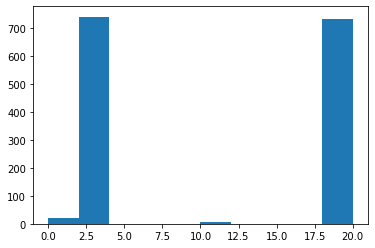

In [187]:
#checking sample distribution
plt.hist(train_data.F1)

In [189]:
train_data.shape

(1500, 16)

In [190]:
train_data.nunique()

F1         4
F2       660
F3       216
F4        91
F5       649
F6       650
F7        11
F8       214
F9       400
F10      656
F11      432
F12      141
F13       80
F14      646
F15      331
Class      2
dtype: int64

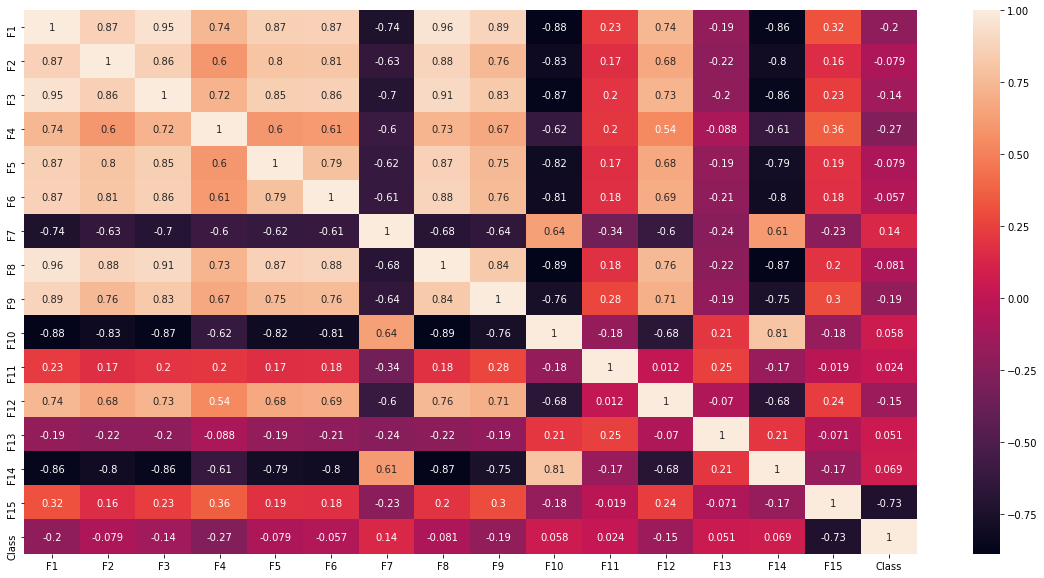

In [191]:
#Plotting Correlation
plt.figure(figsize=(20,10))
correlation=train_data.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

**Data Cleaning**

In [192]:
train_data.isnull().sum()

F1         0
F2         0
F3         0
F4         0
F5         0
F6         0
F7         0
F8         0
F9         0
F10        0
F11        0
F12        0
F13        0
F14        0
F15      750
Class      0
dtype: int64

(array([ 22.,  52.,  98., 116., 129., 135., 101.,  69.,  19.,   9.]),
 array([-8.2  , -7.692, -7.184, -6.676, -6.168, -5.66 , -5.152, -4.644,
        -4.136, -3.628, -3.12 ]),
 <a list of 10 Patch objects>)

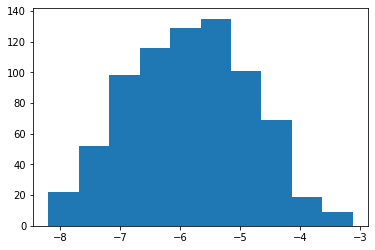

In [193]:
#checking sample distribution
plt.hist(train_data.F15)

In [194]:
#categorical values
#replacing False to 0 and True to 1
cleanup = {"Class": {False:0, True:1}}
train_data.replace(cleanup, inplace=True)
train_data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,20,-21.42,13.1,464.04,-6.10,-4.50,-18.66,27.54,20.1,-7.08,-16.32,365,0.47,3.40,-3.90,0
1,20,-27.12,13.5,299.04,-6.18,-4.91,-18.66,27.44,18.2,-12.84,-11.07,205,-129.53,7.12,NaN,0
2,20,-33.87,10.5,854.04,-9.32,-7.16,-18.66,25.44,11.9,-5.46,-11.01,330,-44.53,4.62,-3.84,0
3,20,-25.38,19.4,809.04,-12.69,-4.95,-23.66,25.54,19.6,-11.31,-7.53,215,-54.53,2.26,NaN,0
4,20,-23.22,16.0,359.04,-7.70,-4.36,-8.66,26.64,25.8,-12.69,-10.20,85,-134.53,-0.20,-7.76,1


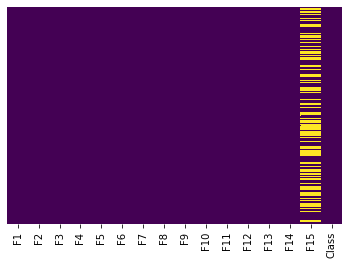

In [195]:
#identifying missing value using heatmap
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [196]:
#treating missing value with mean value
train_data=train_data.fillna(train_data.mean())
train_data.isnull().sum()

F1       0
F2       0
F3       0
F4       0
F5       0
F6       0
F7       0
F8       0
F9       0
F10      0
F11      0
F12      0
F13      0
F14      0
F15      0
Class    0
dtype: int64

**Data Splitting into train and test**

In [197]:
#seprating features and target data
Input=train_data.iloc[:,0:16]
x = Input.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
train_data = pd.DataFrame(x_scaled)
train_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.0,0.901321,0.632850,0.428571,0.874183,0.892498,0.384615,0.635468,0.640127,0.310544,0.425758,0.935897,0.767442,0.284879,0.846457,0.0
1,1.0,0.753691,0.652174,0.204082,0.867647,0.860789,0.384615,0.630542,0.579618,0.152389,0.690909,0.525641,0.162791,0.420745,0.463974,0.0
2,1.0,0.578866,0.507246,0.959184,0.611111,0.686775,0.384615,0.532020,0.378981,0.355025,0.693939,0.846154,0.558140,0.329438,0.858268,0.0
3,1.0,0.798757,0.937198,0.897959,0.335784,0.857695,0.192308,0.536946,0.624204,0.194399,0.869697,0.551282,0.511628,0.243243,0.463974,0.0
4,1.0,0.854701,0.772947,0.285714,0.743464,0.903326,0.769231,0.591133,0.821656,0.156507,0.734848,0.217949,0.139535,0.153397,0.086614,1.0


In [198]:
#renaming columns of dataset
train_data=train_data.rename(columns={0:'F1',1:'F2',2:'F3',3:'F4',4:'F5',5:'F6',6:'F7',7:'F8',8:'F9',9:'F10',10:'F11',11:'F12',12:'F13',13:'F14',14:'F15',15:'Class'})

In [199]:
from sklearn.model_selection import train_test_split
X = train_data.loc[:, train_data.columns != 'Class']
y = train_data.loc[:, train_data.columns == 'Class']

In [200]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

# **Decision Tree Model**

In [201]:
#building Decision Tree classifier model and training 
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='gini')
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [202]:
#prediction
y_pred = classifier.predict(X_test)

In [203]:
#Confusion matrix and classification report
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[171  41]
 [ 36 127]]
              precision    recall  f1-score   support

         0.0       0.83      0.81      0.82       212
         1.0       0.76      0.78      0.77       163

    accuracy                           0.79       375
   macro avg       0.79      0.79      0.79       375
weighted avg       0.80      0.79      0.79       375



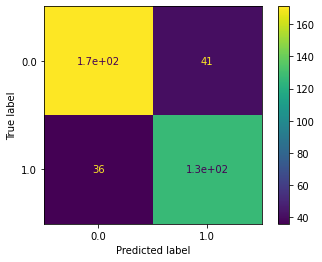

In [204]:
#plotting Confusion matrix
plot_confusion_matrix(classifier, X_test, y_test)  
plt.show()

In [205]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7946666666666666

# **Random forest classifier**

In [206]:
#Building and training Random forest classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=150,max_depth=2, random_state=0)
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [207]:
#prediction
clf.predict(X_test)

array([1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1.,
       0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0.,
       1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 1., 0., 0., 0.

In [208]:
#classification_report
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.81      0.82       212
         1.0       0.76      0.78      0.77       163

    accuracy                           0.79       375
   macro avg       0.79      0.79      0.79       375
weighted avg       0.80      0.79      0.79       375



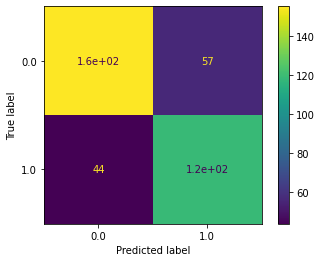

In [209]:
#plotting confusion matrix
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

In [210]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7946666666666666

# **SVM**

In [211]:
#Bulding and training SVM model
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf',C=125)
svclassifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=125, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [212]:
#predicting test data
y_pred = svclassifier.predict(X_test)

In [213]:
#classification_report and confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[200  12]
 [ 24 139]]
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.92       212
         1.0       0.92      0.85      0.89       163

    accuracy                           0.90       375
   macro avg       0.91      0.90      0.90       375
weighted avg       0.90      0.90      0.90       375



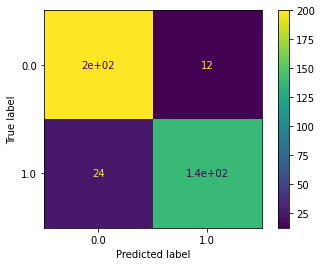

In [214]:
#plotting Confusion matrix
plot_confusion_matrix(svclassifier, X_test, y_test)  
plt.show()

In [215]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.904

# **P2 Test DataSet**

In [216]:
#Loading test dataset
test_data=pd.read_csv("/content/drive/My Drive/CE802/CE802_P2_Test.csv",sep=',')

In [217]:
#Checking test dataset
test_data.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,750.000000
mean,11.025333,-30.832520,7.790587,379.762000,-8.869147,-7.616707,-11.304000,22.274107,10.202187,-5.110020,-12.368500,109.298667,-66.260000,4.654827,-5.876347
std,9.014814,7.602147,6.876599,205.995257,2.528747,2.564617,7.073138,6.476781,8.611866,7.478681,3.604796,116.145702,41.372078,5.022442,1.014522
min,0.000000,-56.370000,0.000000,134.040000,-16.980000,-14.990000,-28.660000,14.700000,0.020000,-19.410000,-27.150000,0.000000,-164.530000,-4.200000,-9.340000
25%,2.000000,-36.540000,1.240000,221.040000,-10.810000,-9.542500,-18.660000,16.080000,2.595000,-12.225000,-14.317500,19.000000,-84.530000,-0.260000,-6.620000
50%,20.000000,-33.765000,10.100000,278.040000,-9.900000,-8.610000,-8.660000,24.540000,10.200000,-2.025000,-11.850000,54.000000,-59.530000,6.560000,-5.875000
75%,20.000000,-23.430000,14.000000,539.040000,-6.470000,-5.170000,-5.660000,28.040000,16.900000,0.600000,-10.102500,195.000000,-46.530000,8.365000,-5.142500
max,20.000000,-17.490000,20.600000,884.040000,-4.500000,-3.200000,-2.660000,35.640000,31.500000,16.020000,-5.220000,400.000000,45.470000,20.460000,-2.950000


In [218]:
#Checking unique data
test_data.nunique()

F1         4
F2       653
F3       213
F4        93
F5       640
F6       667
F7        11
F8       215
F9       397
F10      645
F11      471
F12      139
F13       77
F14      638
F15      339
Class      2
dtype: int64

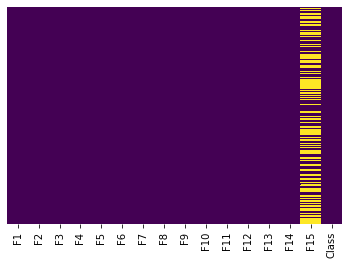

In [219]:
#Checking unique data using heatmap
sns.heatmap(test_data.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [220]:
#treating missing values with mean value
test_data=test_data.fillna(data.mean())
test_data.isnull().sum()

F1       0
F2       0
F3       0
F4       0
F5       0
F6       0
F7       0
F8       0
F9       0
F10      0
F11      0
F12      0
F13      0
F14      0
F15      0
Class    0
dtype: int64

In [221]:
#dropping Column 'class'
test_data.drop("Class",axis=1)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15
0,2,-38.31,1.62,248.04,-11.74,-9.25,-5.66,16.40,2.92,1.17,-13.14,2,-74.53,9.18,0.463974
1,20,-24.03,11.40,629.04,-8.02,-5.35,-28.66,27.14,16.70,-10.56,-8.67,15,-14.53,2.06,0.463974
2,2,-45.06,1.84,206.04,-11.73,-9.28,-7.66,15.94,1.70,-1.77,-20.37,3,-40.53,7.12,0.463974
3,20,-22.35,18.30,539.04,-7.14,-4.15,-28.66,27.14,11.70,-14.97,-8.55,195,-29.53,1.46,-6.930000
4,20,-22.47,10.70,749.04,-7.13,-4.60,-8.66,35.14,28.70,-12.33,-10.47,285,-74.53,-1.74,0.463974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,20,-22.80,14.80,329.04,-5.88,-4.92,-18.66,25.34,13.70,-14.28,-10.98,195,-29.53,3.28,0.463974
1496,2,-37.11,1.48,239.04,-14.27,-10.03,-3.66,16.34,3.02,-1.08,-11.28,20,-75.53,10.10,0.463974
1497,2,-35.67,0.20,200.04,-10.59,-12.15,-7.66,16.42,1.92,-1.08,-9.57,20,-46.53,10.46,0.463974
1498,2,-36.21,1.62,275.04,-11.82,-8.89,-5.66,16.64,1.82,0.36,-11.22,6,-60.53,9.24,0.463974


In [222]:
#splitting data into features and target
#normalizing features
Input=test_data.iloc[:,0:15]
x = Input.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
test_data = pd.DataFrame(x_scaled)
test_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.1,0.464506,0.078641,0.152,0.419872,0.486853,0.884615,0.081184,0.092122,0.580864,0.638851,0.0050,0.428571,0.542579,1.000000
1,1.0,0.831790,0.553398,0.660,0.717949,0.817642,0.000000,0.594078,0.529860,0.249788,0.842681,0.0375,0.714286,0.253852,1.000000
2,0.1,0.290895,0.089320,0.096,0.420673,0.484309,0.807692,0.059217,0.053367,0.497883,0.309166,0.0075,0.590476,0.459043,1.000000
3,1.0,0.875000,0.888350,0.540,0.788462,0.919423,0.000000,0.594078,0.371029,0.125318,0.848153,0.4875,0.642857,0.229521,0.245819
4,1.0,0.871914,0.519417,0.820,0.789263,0.881255,0.769231,0.976122,0.911055,0.199831,0.760602,0.7125,0.428571,0.099757,1.000000


In [223]:
#predicting test data using SVM model
test_pred=svclassifier.predict(test_data)

In [224]:
#Loading test data
test_data_final=pd.read_csv("/content/drive/My Drive/CE802/CE802_P2_Test.csv")
target = pd.DataFrame({'Class': test_pred[:]})

In [225]:
test_data_final['Class']=target

In [226]:
#converting 1 to true and 0 to false
cleanup = {"Class": {0:False,1: True}}
test_data_final.replace(cleanup, inplace=True)

In [227]:
#Write final data into CSV
test_data_final.to_csv('CE802_P2_Test.csv', encoding='utf-8', index=False)